In [1]:
# Importing the basic functions 
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 

# Dataset 

Lets import the dataset and get the basic information 

In [2]:
data = pd.read_csv('Real estate.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [4]:
data.isna().sum()

No                                        0
X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64

In [9]:
data.rename(columns= {'X1 transaction date':'Date','X2 house age': 'Age','X3 distance to the nearest MRT station': 'Nearest Station',
                      'X4 number of convenience stores':'Stores','X5 latitude': 'Latitude',
                      'X6 longitude': 'Longitude','Y house price of unit area': 'Price'}, inplace=True)

In [10]:
data.head()

,No,Date,Age,Nearest Station,Stores,Latitude,Longitude,Price
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


# Exploratory Data Analysis 

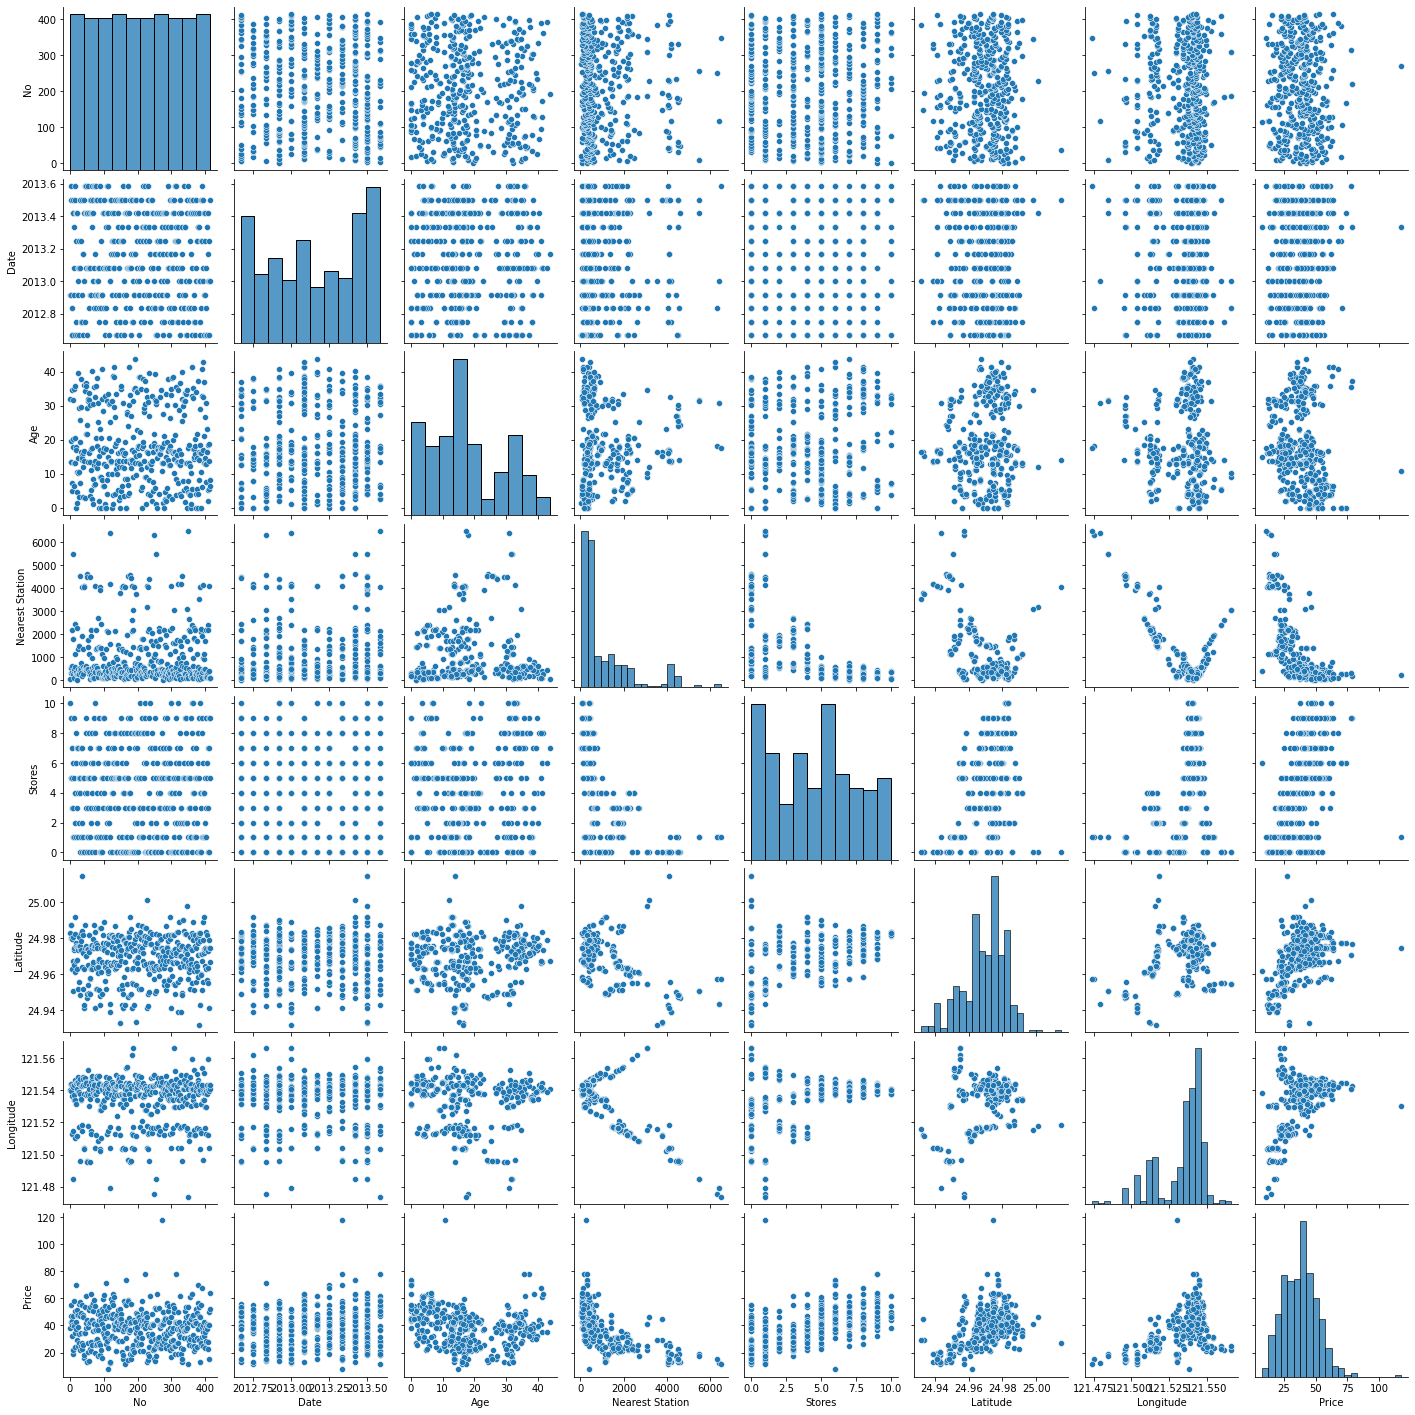

In [11]:
sns.pairplot(data)

As we could see, there are 5 factors that maybe have effects on price. Transaction date, house age, distance to the nearest MRT station, number of convenience stores, latitude and longitude.

with correlation analysis we can figure out the basis information about dependence between features.

In [12]:
data.corr()

,No,Date,Age,Nearest Station,Stores,Latitude,Longitude,Price
No,1.000000,-0.048658,-0.032808,-0.013573,-0.012699,-0.010110,-0.011059,-0.028587
Date,-0.048658,1.000000,0.017549,0.060880,0.009635,0.035058,-0.041082,0.087491
Age,-0.032808,0.017549,1.000000,0.025622,0.049593,0.054420,-0.048520,-0.210567
Nearest Station,-0.013573,0.060880,0.025622,1.000000,-0.602519,-0.591067,-0.806317,-0.673613
Stores,-0.012699,0.009635,0.049593,-0.602519,1.000000,0.444143,0.449099,0.571005
Latitude,-0.010110,0.035058,0.054420,-0.591067,0.444143,1.000000,0.412924,0.546307
Longitude,-0.011059,-0.041082,-0.048520,-0.806317,0.449099,0.412924,1.000000,0.523287
Price,-0.028587,0.087491,-0.210567,-0.673613,0.571005,0.546307,0.523287,1.000000


<AxesSubplot:>

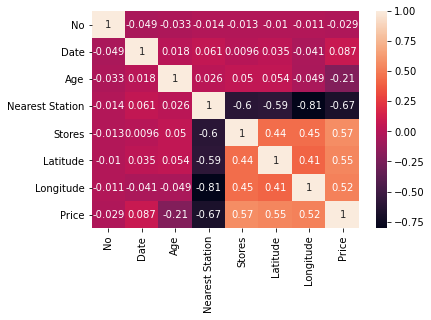

In [14]:
sns.heatmap(data.corr(), annot=True)

In [15]:
data.drop('No', axis = 1, inplace= True)

In [16]:
data.head()

,Date,Age,Nearest Station,Stores,Latitude,Longitude,Price
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


# Target Varibles 

In [17]:
x = data.drop('Price', axis= 1)

In [18]:
y = data.Price

Training and preparing the model 

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size= 0.7, random_state=101)

In [21]:
from sklearn.linear_model import LinearRegression

In [22]:
model = LinearRegression()

In [23]:
model.fit(x_train, y_train)

LinearRegression()

In [26]:
x.columns

Index(['Date', 'Age', 'Nearest Station', 'Stores', 'Latitude', 'Longitude'], dtype='object')

In [31]:
pd.DataFrame(model.coef_, x.columns, columns=['Coefficient'])

,Coefficient
Date,4.839261
Age,-0.274749
Nearest Station,-0.004189
Stores,1.181231
Latitude,242.384317
Longitude,23.399135


In [32]:
y_pred = model.predict(x_test)

# Evaluating the model 

In [33]:
from sklearn import metrics

In [34]:
MAE = metrics.mean_absolute_error(y_test, y_pred)    # |(y_test - y_pred)|

In [35]:
MSE = metrics.mean_squared_error(y_test, y_pred)     # (y_test - y_pred)^2

In [36]:
RMSE = np.sqrt(MSE)

In [41]:
pd.DataFrame([MAE,MSE,RMSE], columns= ['Metrics'], index =['MAE','MSE','RMSE'] )

,Metrics
MAE,5.392294
MSE,46.211798
RMSE,6.797926


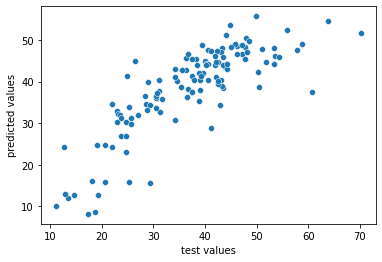

In [44]:
sns.scatterplot(x = y_test, y = y_pred)
plt.xlabel('test values')
plt.ylabel('predicted values')
plt.show()

In [45]:
residuals = y_test - y_pred

C:\Users\aaron\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

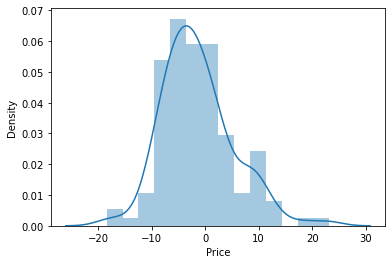

In [48]:
sns.distplot(residuals)